In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cryotherapy/Cryotherapy.csv


In [3]:
# Load the dataset
data_path = '/kaggle/input/cryotherapy/Cryotherapy.csv'
data = pd.read_csv(data_path)

# Display the first few rows
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())# Feature and target selection
# Independent variables (features)
X = data[['age', 'Time', 'Number_of_Warts', 'Type', 'Area']]
# Dependent variable (target)
y = data['Result_of_Treatment']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Size:", X_train.shape)
print("Test Data Size:", X_test.shape)


Dataset Preview:
   sex  age   Time  Number_of_Warts  Type  Area  Result_of_Treatment
0    1   35  12.00                5     1   100                    0
1    1   29   7.00                5     1    96                    1
2    1   50   8.00                1     3   132                    0
3    1   32  11.75                7     3   750                    0
4    1   67   9.25                1     1    42                    0

Missing Values:
sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
Result_of_Treatment    0
dtype: int64


In [4]:
# Feature and target selection
# Independent variables (features)
X = data[['age', 'Time', 'Number_of_Warts', 'Type', 'Area']]
# Dependent variable (target)
y = data['Result_of_Treatment']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Size:", X_train.shape)
print("Test Data Size:", X_test.shape)


Training Data Size: (72, 5)
Test Data Size: (18, 5)


In [5]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

print("Model Training Complete")

Model Training Complete


In [6]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Evaluation Metrics:
Accuracy: 0.7777777777777778

Confusion Matrix:
[[8 1]
 [3 6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.86      0.67      0.75         9

    accuracy                           0.78        18
   macro avg       0.79      0.78      0.77        18
weighted avg       0.79      0.78      0.77        18



In [7]:
# Sample predictions
predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nSample Predictions:")
print(predictions.head())


Sample Predictions:
   Actual  Predicted
0       0          1
1       1          1
2       0          0
3       0          0
4       0          0


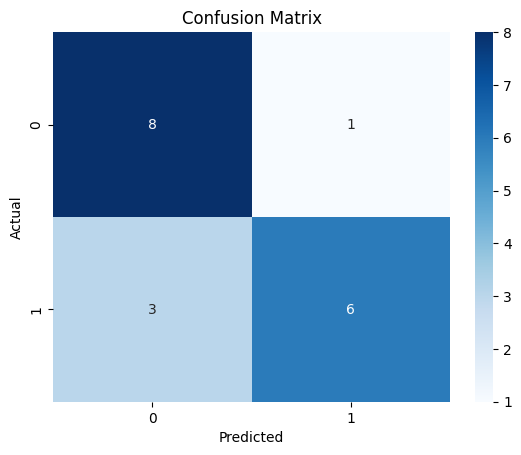

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
